In [76]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [77]:
# import cleaned data file
df = pd.read_csv("_data/df-clean.csv")

In [78]:
df.head()

,Unnamed: 0,Job,Clocked In,Clocked Out,Duration,Earnings,Date,Month,Day,Year,Is Holiday,Holiday Name,Day of Week,Hourly Rate,Season
0,0,Macianos,16:40:00,18:45:00,2.08,59,2020-08-03,8,3,2020,False,NaN,Monday,28.37,Summer
1,1,Macianos,16:08:00,21:52:00,5.73,108,2020-08-04,8,4,2020,False,NaN,Tuesday,18.85,Summer
2,2,Macianos,17:01:00,21:15:00,4.23,81,2020-08-05,8,5,2020,False,NaN,Wednesday,19.15,Summer
3,3,Macianos,16:25:00,22:17:00,5.87,124,2020-08-06,8,6,2020,False,NaN,Thursday,21.12,Summer
4,4,Macianos,16:25:00,21:30:00,5.08,122,2020-08-07,8,7,2020,False,NaN,Friday,24.02,Summer


In [79]:
# Average amount of tips over time
print("Mean of Earnings:", (np.mean(df['Earnings'])).round(2) )
print("Median of Earnings:", (np.median(df['Earnings'])).round(2) )

Mean of Earnings: 133.27
Median of Earnings: 119.0


In [80]:
# separate data into $3 vs $4 tips
tip_3 = df[df['Job'] == 'Macianos']
tip_4 = df[df['Job'] == 'Maciano 2']

tip_4
tip_3

,Unnamed: 0,Job,Clocked In,Clocked Out,Duration,Earnings,Date,Month,Day,Year,Is Holiday,Holiday Name,Day of Week,Hourly Rate,Season
0,0,Macianos,16:40:00,18:45:00,2.08,59,2020-08-03,8,3,2020,False,NaN,Monday,28.37,Summer
1,1,Macianos,16:08:00,21:52:00,5.73,108,2020-08-04,8,4,2020,False,NaN,Tuesday,18.85,Summer
2,2,Macianos,17:01:00,21:15:00,4.23,81,2020-08-05,8,5,2020,False,NaN,Wednesday,19.15,Summer
3,3,Macianos,16:25:00,22:17:00,5.87,124,2020-08-06,8,6,2020,False,NaN,Thursday,21.12,Summer
4,4,Macianos,16:25:00,21:30:00,5.08,122,2020-08-07,8,7,2020,False,NaN,Friday,24.02,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Macianos,14:22:00,20:06:00,5.73,174,2021-06-27,6,27,2021,False,NaN,Sunday,30.37,Summer
176,176,Macianos,16:00:00,20:45:00,4.75,100,2021-07-01,7,1,2021,False,NaN,Thursday,21.05,Summer
177,177,Macianos,16:21:00,20:28:00,4.12,119,2021-07-02,7,2,2021,False,NaN,Friday,28.88,Summer
178,178,Macianos,16:20:00,20:49:00,4.48,108,2021-07-03,7,3,2021,False,NaN,Saturday,24.11,Summer


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    308 non-null    int64  
 1   Job           308 non-null    object 
 2   Clocked In    308 non-null    object 
 3   Clocked Out   308 non-null    object 
 4   Duration      308 non-null    float64
 5   Earnings      308 non-null    int64  
 6   Date          308 non-null    object 
 7   Month         308 non-null    int64  
 8   Day           308 non-null    int64  
 9   Year          308 non-null    int64  
 10  Is Holiday    308 non-null    bool   
 11  Holiday Name  18 non-null     object 
 12  Day of Week   308 non-null    object 
 13  Hourly Rate   308 non-null    float64
 14  Season        308 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 34.1+ KB


### Line Chart Analysis

#### Line Chart 1

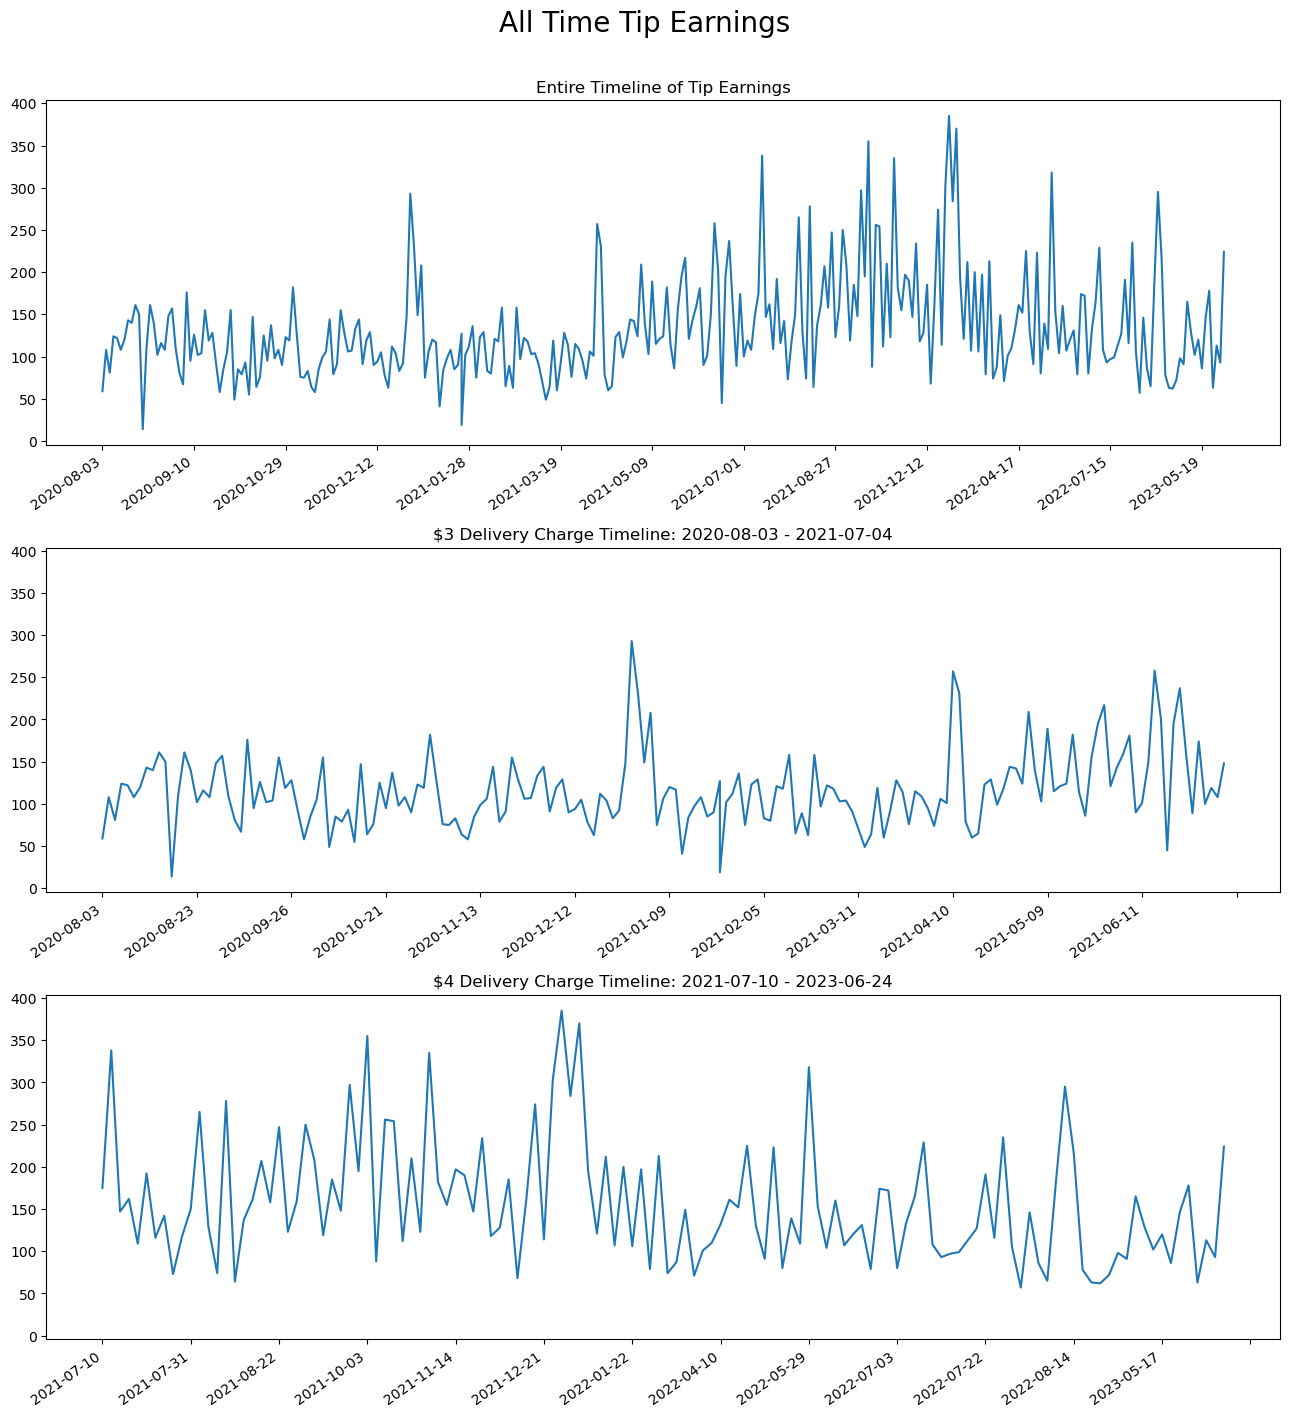

In [82]:
# Line Charts for tip earnings: all time, $3 period, $4 period

fig, axs = plt.subplots(3, 1, figsize=(13, 14), sharey=True)

plt.suptitle('All Time Tip Earnings', y=1.009, fontsize=20)

# 1. Line chart of earning over all shifts worked
days      = list(df['Date'])
earnings  = list(df['Earnings'])
axs[0].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[0].set_title('Entire Timeline of Tip Earnings')

# 2. Line chart over the $3 delivery charge time period, 180 total days
# 2020-08-03 - 2021-07-04
delivery_charge_3 = df[df['Job'] == 'Macianos']
days      = list(delivery_charge_3['Date'])
earnings  = list(delivery_charge_3['Earnings'])
axs[1].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[1].set_title('$3 Delivery Charge Timeline: 2020-08-03 - 2021-07-04')

# 3. Line chart over the $4 delivery charge time period, 180 total days
# 2021-07-10 - 2023-06-24
delivery_charge_4 = df[df['Job'] == 'Maciano 2']
days      = list(delivery_charge_4['Date'])
earnings  = list(delivery_charge_4['Earnings'])
axs[2].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[2].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[2].set_title('$4 Delivery Charge Timeline: 2021-07-10 - 2023-06-24')

# rotate x-axis labels for all subplots
for ax in axs:
    # Adjust the rotation angle, alighn label to the right
    plt.setp(ax.get_xticklabels(), rotation=35, ha='right')  

plt.tight_layout()
plt.show()


#### Line Chart 2

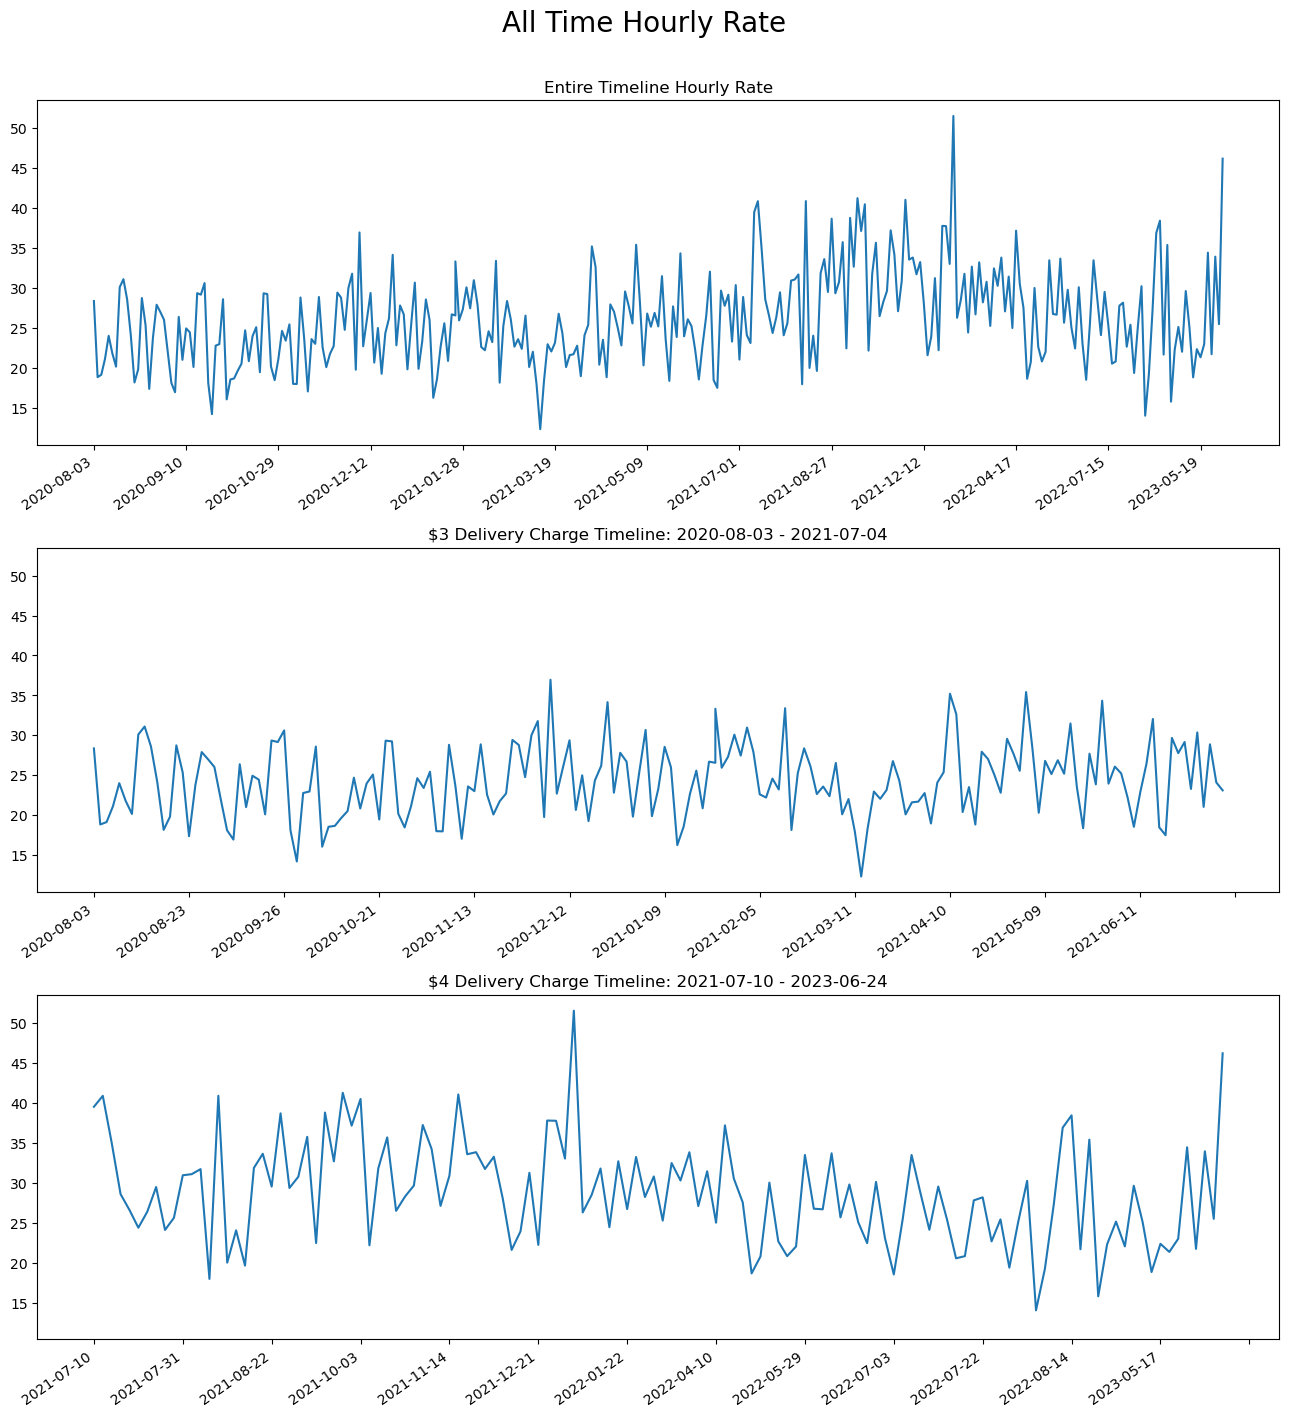

In [83]:
# Line Charts for Hourly Average: all time, $3 period, $4 period

fig, axs = plt.subplots(3, 1, figsize=(13, 14), sharey=True)

plt.suptitle('All Time Hourly Rate', y=1.009, fontsize=20)

# 1. Line chart of hourly over all shifts worked
days      = list(df['Date'])
earnings  = list(df['Hourly Rate'])
axs[0].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[0].set_title('Entire Timeline Hourly Rate')

# 2. Line chart over the $3 delivery charge time period, 180 total days
# 2020-08-03 - 2021-07-04
delivery_charge_3 = df[df['Job'] == 'Macianos']
days      = list(delivery_charge_3['Date'])
earnings  = list(delivery_charge_3['Hourly Rate'])
axs[1].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[1].set_title('$3 Delivery Charge Timeline: 2020-08-03 - 2021-07-04')

# 3. Line chart over the $4 delivery charge time period, 180 total days
# 2021-07-10 - 2023-06-24
delivery_charge_4 = df[df['Job'] == 'Maciano 2']
days      = list(delivery_charge_4['Date'])
earnings  = list(delivery_charge_4['Hourly Rate'])
axs[2].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[2].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[2].set_title('$4 Delivery Charge Timeline: 2021-07-10 - 2023-06-24')

# rotate x-axis labels for all subplots
for ax in axs:
    # Adjust the rotation angle, alighn label to the right
    plt.setp(ax.get_xticklabels(), rotation=35, ha='right')  

plt.tight_layout()
plt.show()


### Barchart Analysis

#### Barchart 1

In [84]:
# create dataframes for $3 and $4 delivery charges
tip_3 = df[df['Job'] == 'Macianos']
tip_4 = df[df['Job'] == 'Maciano 2']

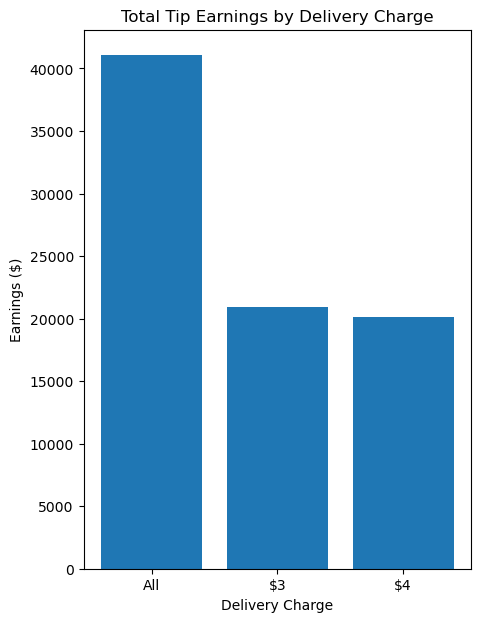

In [85]:
# barchart to show all tips : all vs $3 vs $4

containers = ['All', '$3', '$4']
counts = [df['Earnings'].sum(), tip_3['Earnings'].sum(), tip_4['Earnings'].sum()]

# create plot          
fig, ax = plt.subplots(figsize=(5, 7))

# create barchart
ax.bar(containers, counts)
# set title, labels, etc.
ax.set_title('Total Tip Earnings by Delivery Charge')
ax.set_xlabel('Delivery Charge')
ax.set_ylabel('Earnings ($)')

plt.show()



#### Barchart 2

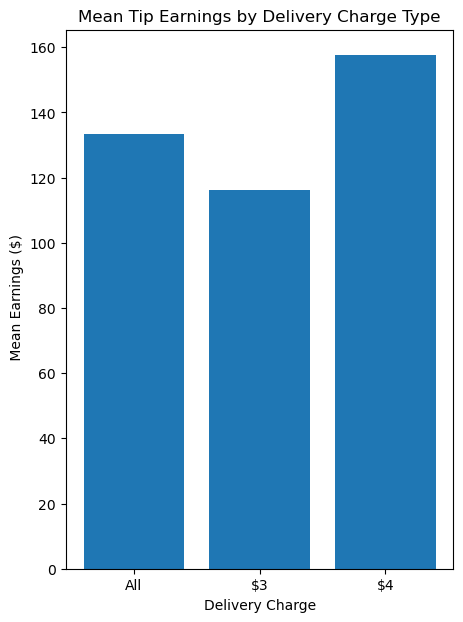

In [86]:
# barchart to show all tips : all vs $3 vs $4

containers = ['All', '$3', '$4']
counts = [df['Earnings'].mean(), tip_3['Earnings'].mean(), tip_4['Earnings'].mean()]

# create plot          
fig, ax = plt.subplots(figsize=(5, 7))

# create barchart
ax.bar(containers, counts)
# set title, labels, etc.
ax.set_title('Mean Tip Earnings by Delivery Charge Type')
ax.set_xlabel('Delivery Charge')
ax.set_ylabel(' Mean Earnings ($)')

plt.show()

#### Barchart 3

In [87]:
# add an order to the day of the week column
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_order, ordered=True)

/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_39671/4030796987.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values = df.groupby(['Day of Week'])['Earnings'].sum()


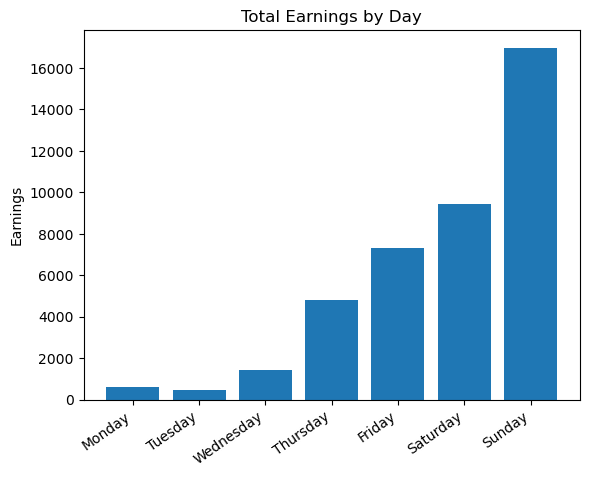

In [101]:
# total tips earned by day of week

fig, ax = plt.subplots()

containers = df['Day of Week'].unique()
values = df.groupby(['Day of Week'])['Earnings'].sum()

ax.bar(containers, values)
ax.set_ylabel('Earnings')
ax.set_title('Total Earnings by Day')

plt.setp(ax.get_xticklabels(), rotation=35, ha='right')

plt.show()

#### Barchart 4

/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_39671/2043196943.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values = df.groupby(['Day of Week'])['Earnings'].mean()


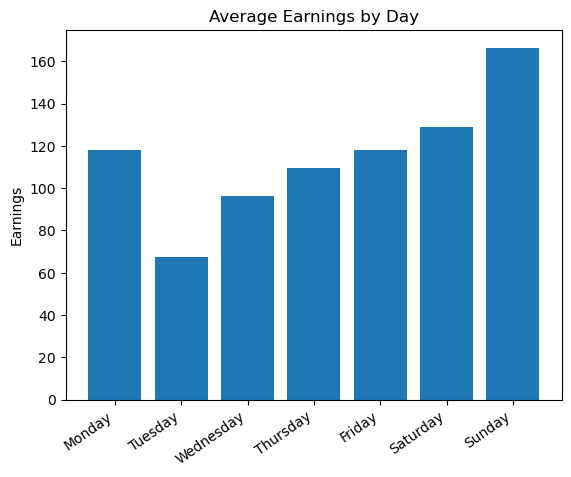

In [102]:
# average tips earned by day of week

fig, ax = plt.subplots()

containers = df['Day of Week'].unique()
values = df.groupby(['Day of Week'])['Earnings'].mean()

ax.bar(containers, values)
ax.set_ylabel('Earnings')
ax.set_title('Average Earnings by Day')

plt.setp(ax.get_xticklabels(), rotation=35, ha='right')

plt.show()

#### Barchart 5

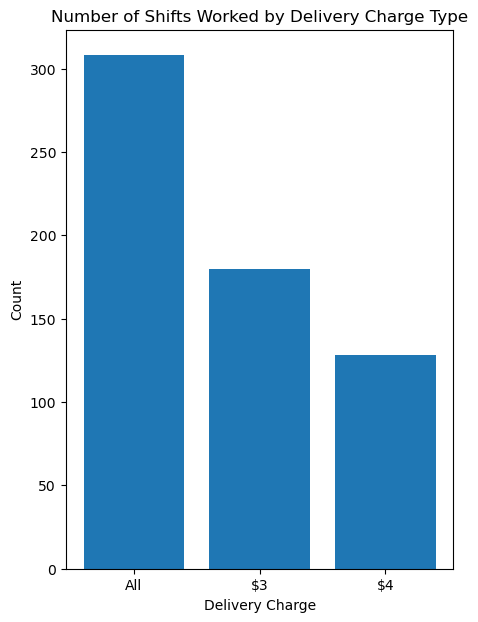

In [111]:
# barchart to show amounts of shifts worked : all vs $3 vs $4

containers = ['All', '$3', '$4']
counts = [len(df), len(tip_3), len(tip_4)]

# create plot          
fig, ax = plt.subplots(figsize=(5, 7))

# create barchart
ax.bar(containers, counts)
# set title, labels, etc.
ax.set_title('Number of Shifts Worked by Delivery Charge Type')
ax.set_xlabel('Delivery Charge')
ax.set_ylabel('Count')

plt.show()

#### Barchart 6

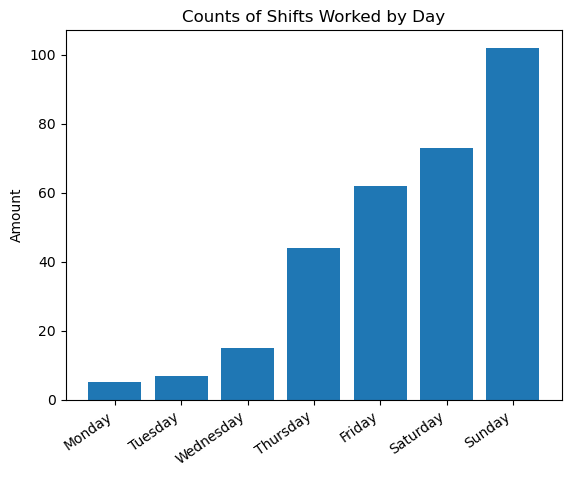

In [109]:
# total shift count by day of week

fig, ax = plt.subplots()

day_counts = df['Day of Week'].value_counts()

# convert 'Day of Week' in day_counts to a categorical type for proper ordering
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts.index = pd.Categorical(day_counts.index, categories=day_order, ordered=True)
day_counts = day_counts.sort_index()

ax.bar(day_counts.index, day_counts.values)
ax.set_ylabel('Amount')
ax.set_title('Counts of Shifts Worked by Day')

plt.setp(ax.get_xticklabels(), rotation=35, ha='right')

plt.show()

#### Side by Side Barchart 1

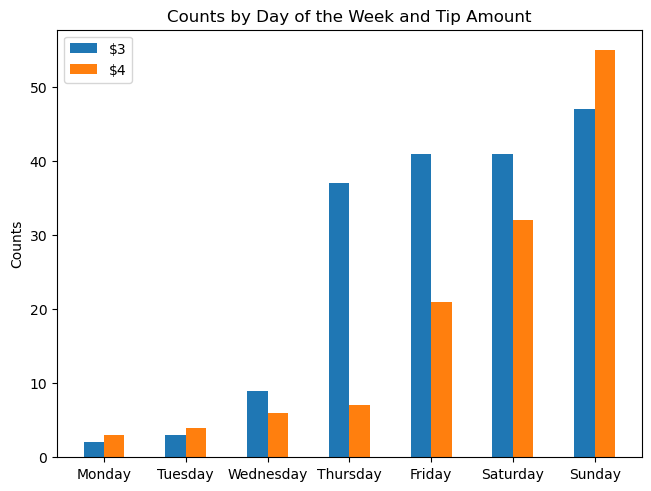

In [171]:
# side by side of total tips earned by day of week
# resource link 2

day_order = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

# prep the data
tip3_counts = tip_3.groupby(['Day of Week'])['Job'].count()
tip4_counts = tip_4.groupby(['Day of Week'])['Job'].count()

# convert 'Day of Week' in day_counts to a categorical type for proper ordering
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tip3_counts.index = pd.Categorical(tip3_counts.index, categories=day_order, ordered=True)
tip3_counts = tip3_counts.sort_index()
tip4_counts.index = pd.Categorical(tip4_counts.index, categories=day_order, ordered=True)
tip4_counts = tip4_counts.sort_index()

# alternate way of doing the above code
# Preparing the data
# tip3_counts = tip_3.groupby(['Day of Week'])['Job'].count().reindex(day_order, fill_value=0)
# tip4_counts = tip_4.groupby(['Day of Week'])['Job'].count().reindex(day_order, fill_value=0)

tip_dict = {
  '$3': tip3_counts,
  '$4': tip4_counts
}

x = np.arange(len(day_order))
width = 0.25
mult  = 0

fig, ax = plt.subplots(layout='constrained')
    
for attribute, measurement in tip_dict.items():
  ax.bar(x + mult * width, measurement, width, label=attribute)
  mult += 1

# customized labels, legend, title
ax.set_ylabel('Counts')
ax.set_title('Counts by Day of the Week and Tip Amount')
ax.set_xticks(x + width / 2)  # x tick position
ax.set_xticklabels(day_order)  # x tick labels
ax.legend()

plt.show()